# DL Lab - 02 Iris DNN - Practice

## Step 1
### 1.1 Explain what we did in the following cell

In the provided cell, several libraries and modules are being imported to set up an environment
for data analysis, preprocessing, and machine learning (specifically deep learning)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Step 2
### 2.1. Explain commented section of the following code.



from sklearn.datasets import load_iris:
This line imports the load_iris function from the sklearn.datasets module. load_iris is a utility
function that provides access to the Iris dataset, which is commonly used for classification
problems. The Iris dataset includes data about three species of iris flowers, with features such as
sepal length, sepal width, petal length, and petal width. It's likely a placeholder for how load_iris works for the Iris dataset.

### 2.2. Where from the `Iris.csv` has been read from in the uncommented executable line of the code?


df = pd.read_csv('/content/iris.csv') The file iris.csv is being read from the path
/content/iris.csv. This path suggests that the code is likely being executed in a Google Colab
environment, where /content/ is the default working directory for Colab sessions.


### 2.3. Find the reasons by reading the error message, if you couldn't run the following cell. How do you rectify it?

DOUBLE CLICK ON THIS CELL TO WRITE YOUR ANSWER

In [ ]:
# from sklearn.datasets import load_iris
# iris = load_iris()
df = pd.read_csv('Iris.csv')

## Step 3
### 3.1. What are we trying to check in the following three cells?


The three cells help inspect and clean the dataset. df.head() previews the first five rows to verify the data structure. df.isnull().sum() identifies missing values in each column, while df.duplicated().sum() checks for duplicate rows.

### 3.2 What do you do if you find any `nulls` and/or `duplicates`?

If nulls are found, they can be handled by dropping rows/columns, imputing values (mean, median, mode, etc.), or using advanced methods like model-based imputation. Duplicates can be removed with df.drop_duplicates(), but it’s important to investigate their origin to decide if they hold any value. Proper handling of nulls and duplicates ensures data quality for analysis.

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:

df.duplicated().sum()

0

## Step 4
### 4.1. Why do we need to encode the labels?


We encode labels to convert categorical values (like text) into numerical format, which is required for most machine learning algorithms.

### 4.2. What exactly the `LabelEncoder` is doing in the following cell?

The LabelEncoder assigns a unique integer to each category in the Species column. Specifically, le.fit_transform(df['Species']) replaces each category with its corresponding integer, while le.classes_ retrieves the original category names for reference. This ensures the data is machine-readable while retaining the mapping to the original labels.

In [ ]:

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Step 5
### 5.1 What are `X` and `y` with respect to `df`?


With respect to df, X represents the feature set, which includes all the input variables needed for the model (in this case, all columns except Id and Species). y represents the target variable, typically extracted as y = df['Species'], which contains the labels or outputs the model aims to predict.

### 5.2 Why we extracted `X` and `y`?

We extract X and y to separate the independent variables (features) from the dependent variable (target), which is essential for training machine learning models. This distinction ensures the model learns from the features (X) to accurately predict the target (y).

In [ ]:
X = df.drop(columns=['Id','Species'])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df['Species']
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts()

,count
Species,
0,50
1,50
2,50


## Step 6
### 6.1 Why do we split?


We split the dataset into training and testing sets to evaluate the model's performance. The training set is used to train the model, while the testing set assesses how well the model generalizes to unseen data.

### 6.2 What is the significance of `0.25`?


The test_size=0.25 specifies that 25% of the data is allocated for testing, and the remaining 75% is used for training. This ensures a balanced split for training and evaluation, but the exact ratio depends on the dataset size and problem context.

### 6.3 Can I choose that value greater than `0.5`?


Yes, you can, but it is generally not recommended unless the dataset is very large. A value greater than 0.5 would mean more data is reserved for testing, leaving less for training, which could result in an under-trained model.

### 6.4 What is the significance of `random_state=7`?

The random_state ensures reproducibility of the split. By setting it to 7, the same random split will occur every time the code is run, which is important for consistent results during development and debugging.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=7)
X_train.shape

(112, 4)

In [ ]:
df.shape

(150, 6)

## Step 7
### 7.1 What exactly we are doing in the following two cells?


In the two cells:

StandardScaler for X_train and X_test:
The StandardScaler is used to scale the feature values of X_train and X_test to have a mean of 0 and a standard deviation of 1. This is done to standardize the input features, which improves the performance and stability of many machine learning algorithms, especially those sensitive to feature scaling (like neural networks).
sc.fit_transform(X_train) computes the mean and standard deviation from X_train and scales it accordingly.
sc.transform(X_test) applies the same scaling (using X_train's mean and standard deviation) to X_test.

One-Hot Encoding for y_train:
The y_train labels are converted into one-hot encoded vectors using tf.keras.utils.to_categorical. This transforms the integer labels of y_train (e.g., 0, 1, 2 for three species) into binary vectors where each label is represented by a vector with a 1 at the position corresponding to the class and 0 elsewhere. This encoding is required for multi-class classification in neural networks.

### 7.2 Why `X` and `y` were treated differently? What is the purpose of doing like that?

X (features) is standardized to bring all the input variables to a similar scale, which is crucial for most machine learning models to function properly.
y (labels) is one-hot encoded because the neural network needs the target variable to be in a format where each category is represented as a separate binary vector. This is necessary for multi-class classification tasks.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-0.87222549,  1.03373066, -1.29757475, -1.14224315],
       [ 1.47325482, -0.11714244,  1.21000835,  1.18377926],
       [ 1.00415875,  0.57338142,  1.09856022,  1.18377926],
       [ 1.12143277, -0.57749168,  0.5970436 ,  0.27921499],
       [ 0.65233671, -0.57749168,  1.04283615,  1.31300273]])

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=3)
y_train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Step 8
### 8.1 What is `Sequential`?


Sequential is a linear stack of layers in Keras, where you can add layers one by one in a sequential manner. Each layer has weights that correspond to the layer before it, and the model is built in a simple, step-by-step way. This is ideal for models where each layer has exactly one input and one output.

### 8.2 Are there any alternative to `Sequential` way to build the model?


Yes, an alternative is using the Functional API in Keras. This allows for more complex models, such as models with multiple inputs/outputs, shared layers, or non-linear connections. Using the Functional API, you define the model by specifying how the layers are connected (rather than stacking them sequentially).

### 8.3 Identify the layer wise details of the model that it creates.

First Layer (Dense):

Units: 32 neurons.
Input Shape: (4,) (indicating 4 input features).
Activation Function: ReLU (Rectified Linear Unit) is used for non-linearity.
Second Layer (Dense):

Units: 32 neurons.
Activation Function: ReLU.
Third Layer (Dropout):

Dropout Rate: 0.5 (50% of the neurons will be randomly "dropped out" during training to prevent overfitting).
Fourth Layer (Dense):

Units: 3 neurons (corresponding to the 3 classes for classification).
Activation Function: Softmax (used for multi-class classification, where the output is a probability distribution across 3 classes).

This model is built for multi-class classification, with the final layer outputting a probability distribution across three classes.

In [ ]:
def get_models():
    model = Sequential([
        Dense(units=32,input_shape=(4,),activation='relu'),
        Dense(units=32,activation='relu'),
        Dropout(0.5),
        Dense(units=3,activation='softmax')
    ])

    return model

## Step 9
### 9.1 What other compiler options we do have?


When compiling a Keras model, you can specify different options for the optimizer, loss function, and evaluation metrics. Here are some common alternatives:

Optimizers:
SGD (Stochastic Gradient Descent),
RMSprop,
Adagrad,
Adadelta,
Nadam.

Loss Functions:
binary_crossentropy (for binary classification),
sparse_categorical_crossentropy (for integer-labeled multi-class classification),
mean_squared_error (for regression problems).

Metrics:
precision
,recall
,AUC (Area Under the Curve)
,f1_score.

The choice of optimizer, loss function, and metrics depends on the specific problem you're solving (e.g., classification vs. regression) and the nature of your data.

### 9.2 How the `model.summary()` method helps us in understanding the architecture?


The model.summary() method provides a detailed summary of the model's architecture. It gives us an overview of the layers, their configurations, and the number of parameters at each layer. This is crucial for understanding how the model is structured and how the data flows through the network.

### 9.3 What details it is providing in the following cell?


Layer Name: The name of each layer in the model (e.g., Dense, Dropout).
Output Shape: The shape of the output tensor at each layer.
Number of Parameters: The total number of parameters in each layer, which includes both the weights and biases.
Total Parameters: The total number of parameters in the entire model, including trainable and non-trainable parameters.

In the given model, it will show the details for the 4 layers (Dense, Dropout, Dense, Dense) and the number of parameters for each.



### 9.4 What other details it can provide for us?

Trainable Parameters: The number of parameters that will be updated during training.

Non-trainable Parameters: The parameters that are fixed and not updated during training (e.g., if the layer uses pre-trained weights).

Layer Types: It lists all layers, including their type (Dense, Dropout, etc.), which helps understand the structure.

Shape Transformations: For each layer, the input and output shapes are shown, helping to visualize how the data flows through the model.

Memory Usage: Depending on the framework and hardware, it can also show an estimate of memory usage by each layer.

In [ ]:
model = get_models()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

## Step 10
### 10.1 What other options do we have for `verbose`?


The verbose parameter in model.fit() controls the level of output during training:

verbose=0: No output, silent mode.

verbose=1: Progress bar, showing the training progress for each epoch.

verbose=2: One line per epoch, showing the epoch number, loss, and metrics.

### 10.2 If you are asked to save the entire history of the training process, how do you do that?


To save the history of the training process, the model.fit() method returns a History object, which contains the training metrics (like loss and accuracy) for each epoch can be assign to a variable.

example: history = model.fit(X_train,y_train,epochs=50, verbose=2)

### 10.3 How do you plot the accuracy and loss curves after the training is over?

After training, you can plot the accuracy and loss curves to visualize the model’s performance across epochs. You can extract values for loss and accuracy from the history.history object and use matplotlib to plot them:

Loss curve: Plots the training and (if applicable) validation loss over epochs.

Accuracy curve: Plots the training and (if applicable) validation accuracy over epochs.

In [ ]:
model.fit(X_train,y_train,epochs=50, verbose=2)

Epoch 1/50
4/4 - 2s - 495ms/step - accuracy: 0.3036 - loss: 1.1672
Epoch 2/50
4/4 - 0s - 45ms/step - accuracy: 0.3393 - loss: 1.1011
Epoch 3/50
4/4 - 0s - 14ms/step - accuracy: 0.5000 - loss: 1.0039
Epoch 4/50
4/4 - 0s - 9ms/step - accuracy: 0.4643 - loss: 0.9845
Epoch 5/50
4/4 - 0s - 16ms/step - accuracy: 0.5714 - loss: 0.9529
Epoch 6/50
4/4 - 0s - 14ms/step - accuracy: 0.6607 - loss: 0.8562
Epoch 7/50
4/4 - 0s - 9ms/step - accuracy: 0.6429 - loss: 0.8210
Epoch 8/50
4/4 - 0s - 9ms/step - accuracy: 0.6518 - loss: 0.8118
Epoch 9/50
4/4 - 0s - 15ms/step - accuracy: 0.6786 - loss: 0.7592
Epoch 10/50
4/4 - 0s - 15ms/step - accuracy: 0.6964 - loss: 0.7463
Epoch 11/50
4/4 - 0s - 14ms/step - accuracy: 0.7143 - loss: 0.6814
Epoch 12/50
4/4 - 0s - 14ms/step - accuracy: 0.7232 - loss: 0.6812
Epoch 13/50
4/4 - 0s - 14ms/step - accuracy: 0.7589 - loss: 0.6318
Epoch 14/50
4/4 - 0s - 14ms/step - accuracy: 0.8036 - loss: 0.5883
Epoch 15/50
4/4 - 0s - 15ms/step - accuracy: 0.7321 - loss: 0.5897
Epoch 

## Step 11
### 11.1 Explain the entire evaluation process in rest of the following cells.

Prediction (model.predict(X_test)):

The model's performance is evaluated on the test set (X_test). Using model.predict(), the model generates predictions based on the input features. This gives us a probability distribution over classes for each test sample.

Convert Probabilities to Class Labels (np.argmax(prediction, axis=-1)):

The model.predict() output is a probability distribution for each class. np.argmax(prediction, axis=-1) converts these probabilities to class labels by selecting the class with the highest probability for each sample.

True Labels (y_test):

y_test represents the true labels for the test set, which are used for comparison with the predicted labels.
Accuracy Calculation (accuracy_score(y_test, prediction)):

The accuracy is calculated by comparing the predicted labels (prediction) with the true labels (y_test). It measures the proportion of correctly predicted labels to the total number of samples.

Confusion Matrix (confusion_matrix(y_test, prediction)):

The confusion matrix provides a detailed breakdown of the model's predictions:

Diagonal elements represent correct predictions (true positives).
Off-diagonal elements represent misclassifications (false positives/negatives).
This matrix is useful for understanding which classes are being misclassified.

Heatmap of Confusion Matrix (using sns.heatmap):

The confusion matrix is visualized as a heatmap using seaborn. The heatmap provides a clear, color-coded view of the confusion matrix, making it easy to spot misclassifications.

xticklabels and yticklabels: These are set to the species names to label the axes with the actual and predicted classes.

annot=True: Displays the values inside each cell of the heatmap.

fmt='d': Ensures the values are displayed as integers.


In [ ]:
prediction = model.predict(X_test)
prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[2.04060618e-02, 2.33984649e-01, 7.45609224e-01],
       [1.24621615e-01, 5.61846495e-01, 3.13531995e-01],
       [9.98318613e-01, 7.94319494e-04, 8.87032948e-04],
       [8.44890773e-02, 5.12997687e-01, 4.02513355e-01],
       [1.17201935e-02, 8.39408517e-01, 1.48871318e-01],
       [1.98902220e-01, 7.50180483e-01, 5.09172864e-02],
       [1.22401537e-02, 3.49048942e-01, 6.38710856e-01],
       [3.28100324e-02, 8.04651201e-01, 1.62538916e-01],
       [9.98070002e-01, 1.00803073e-03, 9.22019011e-04],
       [4.38176729e-02, 3.35764855e-01, 6.20417476e-01],
       [8.26418772e-03, 2.57773966e-01, 7.33961761e-01],
       [1.58917606e-01, 2.37682909e-01, 6.03399396e-01],
       [9.99857426e-01, 4.70080195e-05, 9.55901123e-05],
       [8.30388686e-04, 4.28385809e-02, 9.56330955e-01],
       [9.96542871e-01, 1.75701582e-03, 1.70014752e-03],
       [4.36701104e-02, 2.12919638e-01, 7.43410289e-01],
       [1.10995863e-03, 3.31595659e-01, 6.67294383e-01],
       [1.03598665e-02, 1.74773

In [ ]:
prediction = np.argmax(prediction,axis=-1)
prediction

array([2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0])

In [ ]:
y_test

,Species
149,2
84,1
40,0
66,1
106,2
41,0
52,1
94,1
11,0
51,1


In [ ]:
acury = accuracy_score(y_test,prediction)
acury

0.7894736842105263

In [ ]:
cm = confusion_matrix(y_test,prediction)
cm

array([[10,  1,  0],
       [ 0,  9,  5],
       [ 0,  2, 11]])

Text(50.72222222222221, 0.5, 'Actual')

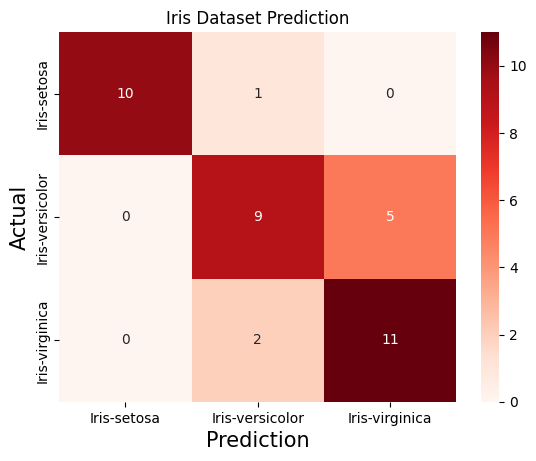

In [ ]:
ax = sns.heatmap(cm,annot=True, fmt='d',cmap='Reds',xticklabels=species_name,yticklabels=species_name)
ax.set_title("Iris Dataset Prediction")
ax.set_xlabel('Prediction',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)